<a href="https://colab.research.google.com/github/mint-aguccim/Machine_Learning_Programming/blob/main/10%EC%A3%BC%EC%B0%A8/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# -----------------------------------------------------------------
# 1. 데이터 로딩
# -----------------------------------------------------------------
def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

In [4]:
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    loaded = np.dstack(loaded)
    return loaded

In [5]:
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    filenames = list()
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    X = load_group(filenames, filepath)
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

In [6]:
def load_dataset(prefix=''):
    trainX, trainy = load_dataset_group('train', prefix + '/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/')
    testX, testy = load_dataset_group('test', prefix + '/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/')

    trainy = trainy - 1
    testy = testy - 1
    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

In [7]:
# 데이터 로드
trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

/tmp/ipython-input-3123268371.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-3123268371.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-3123268371.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-3123268371.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


In [8]:
# -----------------------------------------------------------------
# 2. 데이터 분리
# -----------------------------------------------------------------
from sklearn.model_selection import train_test_split

# 훈련 데이터를 훈련/검증 세트로 분리
X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val=train_test_split(trainX, trainy_one_hot, trainy,test_size=0.2,random_state=100)

print(X_train.shape,X_val.shape,y_train_one_hot.shape,y_val_one_hot.shape,y_train.shape,y_val.shape)

# 모델 입/출력 형태 정의
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_one_hot.shape[1]

(5881, 128, 9) (1471, 128, 9) (5881, 6) (1471, 6) (5881, 1) (1471, 1)


In [9]:
# -----------------------------------------------------------------
# 3. 모델 정의
# -----------------------------------------------------------------
from tensorflow.keras.models import Sequential
# LSTM 레이어를 import 합니다.
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Keras Sequential API를 사용한 LSTM 모델
lstm_model = Sequential()

In [10]:
# LSTM 레이어
# 100개의 유닛(메모리 셀)을 가진 LSTM 층을 추가합니다.
# input_shape는 (타임스텝, 피처 수) = (128, 9) 입니다.
lstm_model.add(LSTM(100, input_shape=(n_timesteps, n_features)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# 과적합 방지를 위한 Dropout
lstm_model.add(Dropout(0.5))

In [12]:
# 분류기를 위한 Dense 레이어
lstm_model.add(Dense(100, activation='relu'))
lstm_model.add(Dense(n_outputs, activation='softmax'))

In [13]:
# 모델 컴파일
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# 모델 요약 출력
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        44,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,706 (213.70 KB)

 Trainable params: 54,706 (213.70 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# -----------------------------------------------------------------
# 4. 모델 훈련
# -----------------------------------------------------------------

# 모델 훈련 (단일 입력, validation_data 사용)
model_history = lstm_model.fit(
    X_train, y_train_one_hot,  # 단일 입력
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val_one_hot) # 이미 분리한 검증 데이터 사용
)

Epoch 1/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.4102 - loss: 1.4347 - val_accuracy: 0.5568 - val_loss: 1.0665
Epoch 2/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.5775 - loss: 0.9953 - val_accuracy: 0.7016 - val_loss: 0.7196
Epoch 3/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.7333 - loss: 0.6383 - val_accuracy: 0.8151 - val_loss: 0.5334
Epoch 4/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - accuracy: 0.7679 - loss: 0.5904 - val_accuracy: 0.4806 - val_loss: 1.3806
Epoch 5/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - accuracy: 0.7214 - loss: 0.7229 - val_accuracy: 0.8246 - val_loss: 0.4536
Epoch 6/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - accuracy: 0.8604 - loss: 0.4123 - val_accuracy: 0.8878 - val_loss: 0.2781
Epoch 7/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - accuracy: 0.9096 - loss: 0.2737 - val_accuracy: 0.9171 - val_loss: 0.2589
Epoch 8/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - accuracy: 0.9316 - loss: 0.1883 - 

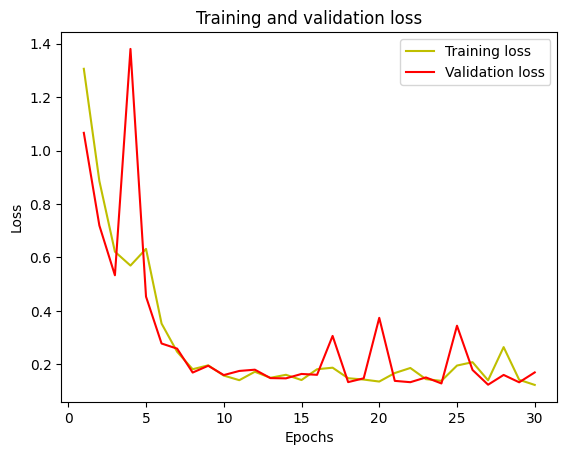

In [16]:
# -----------------------------------------------------------------
# 5. 모델 평가 및 시각화
# -----------------------------------------------------------------

# 손실 그래프
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

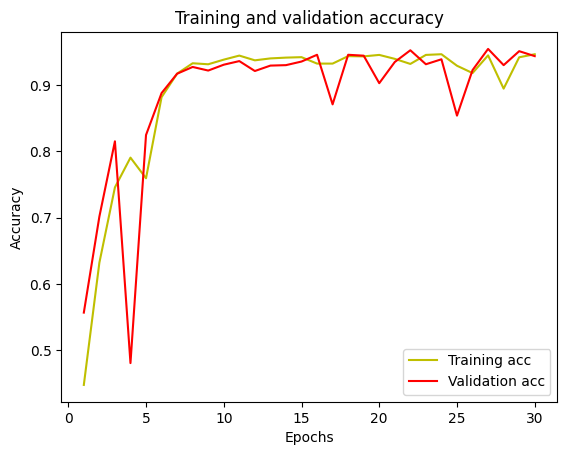

In [17]:
# 정확도 그래프
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# -----------------------------------------------------------------
# 6. 최종 예측 및 혼동 행렬 (Simple CNN과 동일)
# -----------------------------------------------------------------
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [19]:
# 예측 (단일 입력)
pred_probabilities = lstm_model.predict(testX) # 단일 입력
pred = np.argmax(pred_probabilities, axis=-1)

93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step


[[474  19   3   0   0   0]
 [ 35 433   0   2   1   0]
 [  0   0 420   0   0   0]
 [  1  24   0 376  90   0]
 [  1   2   0  82 447   0]
 [  0  39   0   0   0 498]]
0.8985408890397014
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       496
           1       0.84      0.92      0.88       471
           2       0.99      1.00      1.00       420
           3       0.82      0.77      0.79       491
           4       0.83      0.84      0.84       532
           5       1.00      0.93      0.96       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



<Axes: >

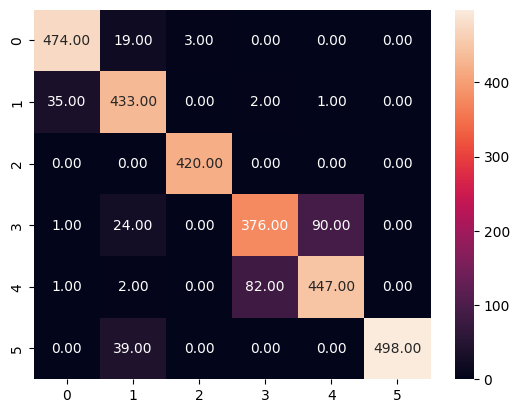

In [20]:
# 평가
cm = confusion_matrix(testy, pred)
print(cm)
print(accuracy_score(testy, pred))
print(classification_report(testy, pred))
sns.heatmap(cm, annot=True, fmt='.2f')